In [1]:
## Notebook env: mirtud_env (mirtud_env kernel)
### This notebook analyzes how well the model in MAVE_trial.ipynb (and MAVE_trial.nbconvert.ipynb)
## learned the data by analyzing the pearson Rs for each cell between inputted raw data and 
## MAVE reconstructed output data
### The notebook also looks at stabilization of loss functions 
##loss_scalers = [10000, 1, 1, 10000]

%load_ext rpy2.ipython

In [2]:
%%R
library(ggplot2)
library(stringr)
library(tidyr)
library(ggpointdensity)

In [3]:
%%R
Loss <- read.csv('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/logs/training.log.2023-02-08_17032027.228776', sep ='\t')
colnames(Loss)[2] <- 'Total_Loss'
Loss$Recon_Loss <- str_sub(Loss$Recon_Loss, start = 8, end = 17)
Loss$KLD_Loss <- str_sub(Loss$KLD_Loss, start = 8, end = 13)
Loss$Classification_Loss <- str_sub(Loss$Classification_Loss, start = 8, end = 13)
Loss$Triplet_Loss <- str_sub(Loss$Triplet_Loss, start = 8, end = 13)
Loss[,3:6] <- apply(Loss[,3:6], 2, as.numeric)
Loss$Recon_Loss[which(is.na(Loss$Recon_Loss))] = Loss$Recon_Loss[which(is.na(Loss$Recon_Loss)) - 1]


Loss$Recon_Loss <- Loss$Recon_Loss/max(Loss$Recon_Loss)
Loss$KLD_Loss <- Loss$KLD_Loss/max(Loss$KLD_Loss)
Loss$Classification_Loss <- Loss$Classification_Loss/max(Loss$Classification_Loss)
Loss$Triplet_Loss <- Loss$Triplet_Loss/max(Loss$Triplet_Loss)


Individual_losses <- pivot_longer(Loss, cols = 3:6, names_to = 'Loss_type', values_to = 'Loss')


In [4]:
%%R
Loss

    Epoch Total_Loss Recon_Loss    KLD_Loss Classification_Loss Triplet_Loss
1       0   7.074375  0.9982071 1.000000000           1.0000000    0.9409258
2       1   6.677487  0.9622048 0.545138083           0.9949793    1.0000000
3       2   6.551233  1.0000000 0.338361569           0.9982752    0.9382142
4       3   6.463090  0.8833863 0.212578324           0.9954745    0.9563238
5       4   6.416009  0.8930563 0.121141796           0.9907270    0.9703661
6       5   6.390800  0.9244969 0.066604781           0.9941254    0.9608755
7       6   6.370270  0.9083650 0.043861685           0.9916492    0.9652334
8       7   6.360371  0.9346839 0.031561847           0.9932032    0.9694945
9       8   6.350629  0.9479724 0.019494082           0.9900951    0.9689134
10      9   6.341568  0.9197918 0.014388489           0.9925201    0.9678482
11     10   6.334757  0.9141384 0.012531910           0.9915467    0.9693008
12     11   6.331790  0.9350074 0.008818751           0.9908294    0.9681387

 0.007890462           0.9926397    0.9681387
15     14   6.316678  0.9023666 0.007426317           0.9895828    0.9683324
16     15   6.312759  0.9223020 0.006033883           0.9829226    0.9685261
17     16   6.308698  0.8843125 0.006498027           0.9908465    0.9679450
18     17   6.307728  0.9137090 0.006730100           0.9894120    0.9685261
19     18   6.300500  0.8723646 0.006498027           0.9882166    0.9674608
20     19   6.303705  0.9406727 0.007426317           0.9867309    0.9700755
21     20   6.299092  0.9021574 0.008354607           0.9935618    0.9678482
22     21   6.298868  0.9296735 0.007426317           0.9942449    0.9680418
23     22   6.291700  0.9128753 0.006498027           0.9875164    0.9681387
24     23   6.284425  0.8432955 0.006265955           0.9921786    0.9688166
25     24   6.289369  0.9535486 0.007194245           0.9856379    0.9682355
26     25   6.281476  0.8700985 0.007194245           0.9922469    0.9676545
27     26   6.279568  0.869984

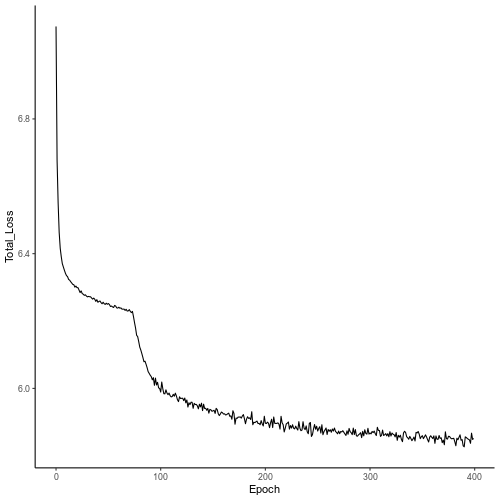

In [5]:
%%R -h 500 -w 500
Total_loss_plot <- ggplot(Loss, aes(Epoch, Total_Loss)) + geom_path() + theme_classic()
Total_loss_plot

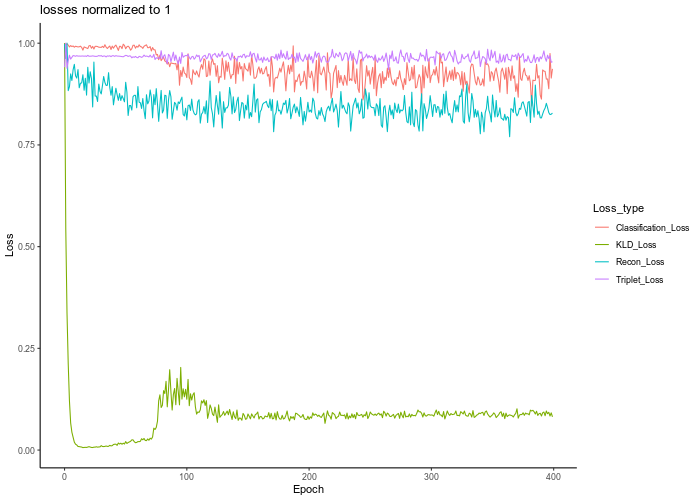

In [6]:
%%R -h 500 -w 700
Individual_loss_plot <- ggplot(Individual_losses, aes(Epoch, Loss, color = Loss_type)) + geom_path() + theme_classic() + ggtitle("losses normalized to 1")
Individual_loss_plot

In [7]:
%%R
Rs <- read.csv('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/R_tbl.csv')

epoch_1 = as.numeric(Rs[1,])
epoch_200 = as.numeric(Rs[200,])
epoch_400 = as.numeric(Rs[400,])

df <- data.frame(epoch_1, epoch_200, epoch_400)
df <- pivot_longer(df, cols = 1:3, names_to = 'Epoch', values_to = 'Rs')

In [8]:
%%R
head(df)

# A tibble: 6 × 2
  Epoch            Rs
  <chr>         <dbl>
1 epoch_1     0      
2 epoch_200 199      
3 epoch_400 399      
4 epoch_1    -0.00178
5 epoch_200   0.962  
6 epoch_400   0.962  


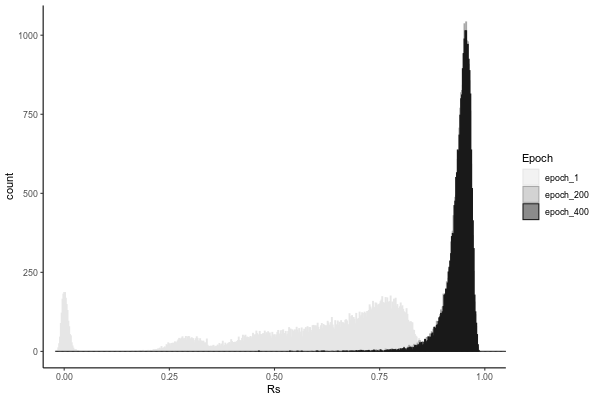

In [9]:
%%R -h 400 -w 600
df$Epoch <- factor(df$Epoch, levels = c('epoch_1', 'epoch_200', 'epoch_400'))
R_learning <- ggplot(df, aes(x=Rs, fill=Epoch, color=Epoch)) +
geom_histogram(position="identity", alpha=0.5, bins = 200000) + scale_color_grey(start = 0.9, end = 0.1) +
scale_fill_grey(start = 0.9, end = 0.1) +
theme_classic() + coord_cartesian(xlim = c(0,1))
R_learning

In [10]:
%%R
medians <- matrixStats::rowMedians(as.matrix(Rs))
Loss$medians <- medians

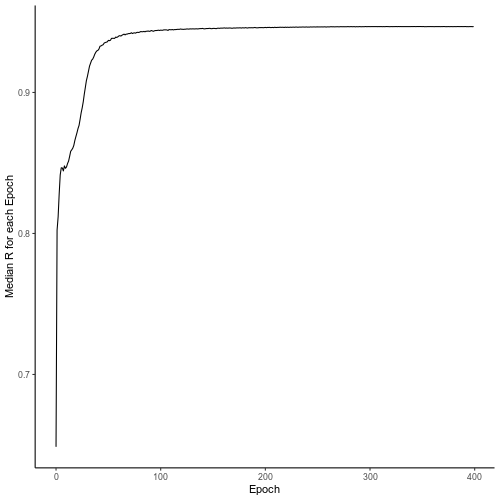

In [11]:
%%R -h 500 -w 500
R_median_plot <-ggplot(Loss, aes(Epoch, medians)) + geom_path() + ylab('Median R for each Epoch') + theme_classic()
R_median_plot

In [12]:
%%R
UMAP_output <- read.csv("/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/UMAP-OF-MU.tsv.gz", sep = '\t', row.names = 1)
head(UMAP_output)

                              UMAP1    UMAP2            guide
miR_2:TCCTCCCCACGCAGTC-1  2.9167760 2.148159        miR-19-5p
miR_1:TAGTGCACAGCATGCC-1 -0.7075775 4.167809           TuD_NC
miR_3:CACGTTCGTTACAGCT-1 -4.0586023 6.971045 miR-28-5p/708-5p
miR_2:ACAGCCGCATTATGCG-1 -1.7647820 5.258534      miR-130b-5p
miR_3:GATAGCTAGATCGCCC-1  0.7438178 3.120082       miR-186-5p
miR_3:AACCCAAAGCGAGAAA-1  2.1284375 2.991779       miR-628-3p


In [13]:
%%R
library(dplyr)
MAVE_latent_2dims <- read.csv("/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/scMAVE_mu-matrix.tsv.gz", sep = '\t', row.names = 1)
MAVE_latent_2dims <- select(MAVE_latent_2dims, LV.mu.0, LV.mu.1)
MAVE_latent_2dims$guide <- UMAP_output$guide
head(MAVE_latent_2dims)

                             LV.mu.0      LV.mu.1            guide
miR_2:TCCTCCCCACGCAGTC-1  0.00262087  0.098722942        miR-19-5p
miR_1:TAGTGCACAGCATGCC-1  0.06656547 -0.010215579           TuD_NC
miR_3:CACGTTCGTTACAGCT-1 -0.03463717 -0.202018678 miR-28-5p/708-5p
miR_2:ACAGCCGCATTATGCG-1  0.04439338 -0.056539826      miR-130b-5p
miR_3:GATAGCTAGATCGCCC-1  0.01615569 -0.010855962       miR-186-5p
miR_3:AACCCAAAGCGAGAAA-1 -0.10962907  0.008932643       miR-628-3p



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [14]:
%%R
guides = unique(MAVE_latent_2dims$guide)
tmp_df = as.data.frame(matrix(0, nrow = nrow(MAVE_latent_2dims), ncol = length(guides)))
colnames(tmp_df) = guides
for (i in 1:length(guides)){
    guide_cells = MAVE_latent_2dims$guide == guides[i]
    vec = MAVE_latent_2dims$guide
    vec[guide_cells] = 'Guide'
    vec[!guide_cells] = 'N/A'
    tmp_df[,i] <- vec
}
MAVE_latent_2dims = cbind(MAVE_latent_2dims, tmp_df)

In [15]:
%%R
guides = unique(UMAP_output$guide)
tmp_df = as.data.frame(matrix(0, nrow = nrow(UMAP_output), ncol = length(guides)))
colnames(tmp_df) = guides
for (i in 1:length(guides)){
    guide_cells = UMAP_output$guide == guides[i]
    vec = UMAP_output$guide
    vec[guide_cells] = 'Guide'
    vec[!guide_cells] = 'N/A'
    tmp_df[,i] <- vec
}
UMAP_output_2dims = cbind(UMAP_output, tmp_df)

In [16]:
%%R
print(paste(nrow(MAVE_latent_2dims), 'rows'))
print(paste(ncol(MAVE_latent_2dims), 'columns'))
head(MAVE_latent_2dims[, 1:5])

[1] "23478 rows"
[1] "339 columns"
                             LV.mu.0      LV.mu.1            guide miR-19-5p
miR_2:TCCTCCCCACGCAGTC-1  0.00262087  0.098722942        miR-19-5p     Guide
miR_1:TAGTGCACAGCATGCC-1  0.06656547 -0.010215579           TuD_NC       N/A
miR_3:CACGTTCGTTACAGCT-1 -0.03463717 -0.202018678 miR-28-5p/708-5p       N/A
miR_2:ACAGCCGCATTATGCG-1  0.04439338 -0.056539826      miR-130b-5p       N/A
miR_3:GATAGCTAGATCGCCC-1  0.01615569 -0.010855962       miR-186-5p       N/A
miR_3:AACCCAAAGCGAGAAA-1 -0.10962907  0.008932643       miR-628-3p       N/A
                         TuD_NC
miR_2:TCCTCCCCACGCAGTC-1    N/A
miR_1:TAGTGCACAGCATGCC-1  Guide
miR_3:CACGTTCGTTACAGCT-1    N/A
miR_2:ACAGCCGCATTATGCG-1    N/A
miR_3:GATAGCTAGATCGCCC-1    N/A
miR_3:AACCCAAAGCGAGAAA-1    N/A


In [17]:
%%R
UMAP_output[1:5,c(1,2)]

                              UMAP1    UMAP2
miR_2:TCCTCCCCACGCAGTC-1  2.9167760 2.148159
miR_1:TAGTGCACAGCATGCC-1 -0.7075775 4.167809
miR_3:CACGTTCGTTACAGCT-1 -4.0586023 6.971045
miR_2:ACAGCCGCATTATGCG-1 -1.7647820 5.258534
miR_3:GATAGCTAGATCGCCC-1  0.7438178 3.120082


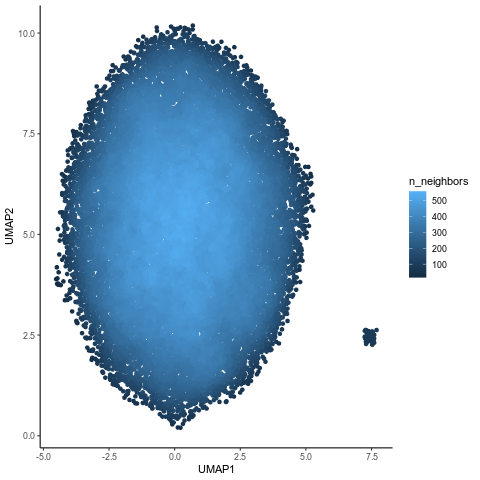

In [18]:
%%R
## density plot of cells plotted in UMAP1/UMAP2 space
library(ggplot2)
library(ggpointdensity)
library(stringr)
ggplot(UMAP_output, aes(UMAP1, UMAP2)) + geom_pointdensity() + theme_classic() +
xlab('UMAP1') + ylab('UMAP2')

In [19]:
%%R
MAVE_latent_2dims[1:5,1:5]

                             LV.mu.0     LV.mu.1            guide miR-19-5p
miR_2:TCCTCCCCACGCAGTC-1  0.00262087  0.09872294        miR-19-5p     Guide
miR_1:TAGTGCACAGCATGCC-1  0.06656547 -0.01021558           TuD_NC       N/A
miR_3:CACGTTCGTTACAGCT-1 -0.03463717 -0.20201868 miR-28-5p/708-5p       N/A
miR_2:ACAGCCGCATTATGCG-1  0.04439338 -0.05653983      miR-130b-5p       N/A
miR_3:GATAGCTAGATCGCCC-1  0.01615569 -0.01085596       miR-186-5p       N/A
                         TuD_NC
miR_2:TCCTCCCCACGCAGTC-1    N/A
miR_1:TAGTGCACAGCATGCC-1  Guide
miR_3:CACGTTCGTTACAGCT-1    N/A
miR_2:ACAGCCGCATTATGCG-1    N/A
miR_3:GATAGCTAGATCGCCC-1    N/A


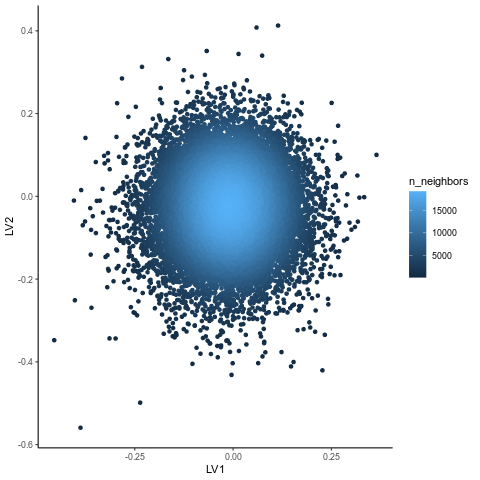

In [20]:
%%R
## density plot of cells plotted in LV.mu.0/LV.mu.1 space
library(ggplot2)
library(ggpointdensity)
library(stringr)
ggplot(MAVE_latent_2dims[,c(1,2)], aes(LV.mu.0, LV.mu.1)) + geom_pointdensity() + theme_classic() +
xlab('LV1') + ylab('LV2')


In [21]:
%%R
plts <- list()
for (i in 1:length(1:length(guides))){
    tmp <- MAVE_latent_2dims[,c(1,2,(i+3))]
    colnames(tmp)[3] <- 'Type'
    tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
    if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
        plts[[i]] <- ggplot(tmp, aes(LV.mu.0, LV.mu.1, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('LV1') + ylab('LV2')
    } else {
        plts[[i]] <- ggplot(tmp, aes(LV.mu.0, LV.mu.1, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('LV1') + ylab('LV2')
    }
}


In [22]:
%%R
plts2 <- list()
for (i in 1:length(1:length(guides))){
    tmp <- UMAP_output_2dims[,c(1,2,(i+3))]
    colnames(tmp)[3] <- 'Type'
    tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
    if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
        plts2[[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
    } else {
        plts2[[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
    }
}


In [23]:
%%R
library(ggpubr)
umap_plts <- rep(list('empty'), ceiling(length(plts2)/25))
for (i in 1:ceiling(length(plts2)/25)){
    umap_plts[[i]] <- ggarrange(plotlist = plts2[(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
}

In [24]:
%%R
library(ggpubr)
latent_plts <- rep(list('empty'), ceiling(length(plts)/25))
for (i in 1:ceiling(length(plts)/25)){
    latent_plts[[i]] <- ggarrange(plotlist = plts[(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
}

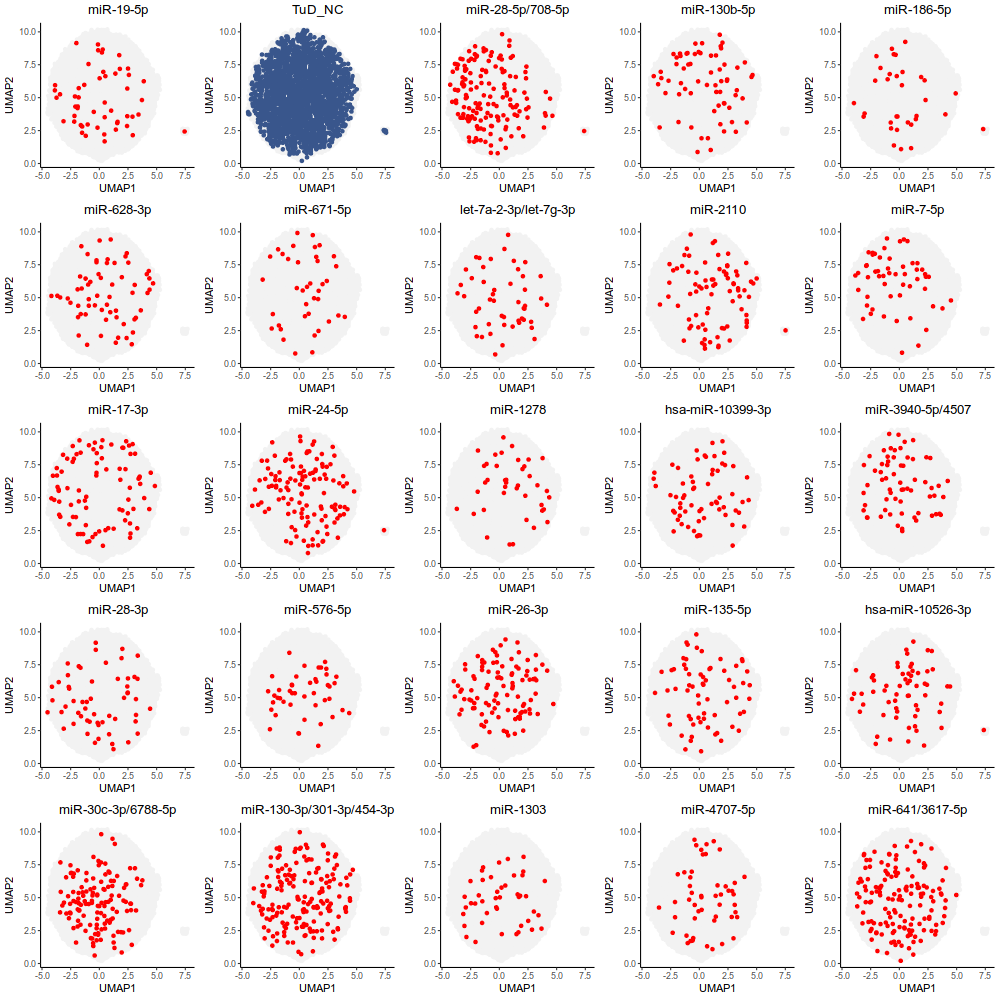

In [25]:
%%R -w 1000 -h 1000
## non-targeting control guides are blue and targeting guides are red
umap_plts[[1]]

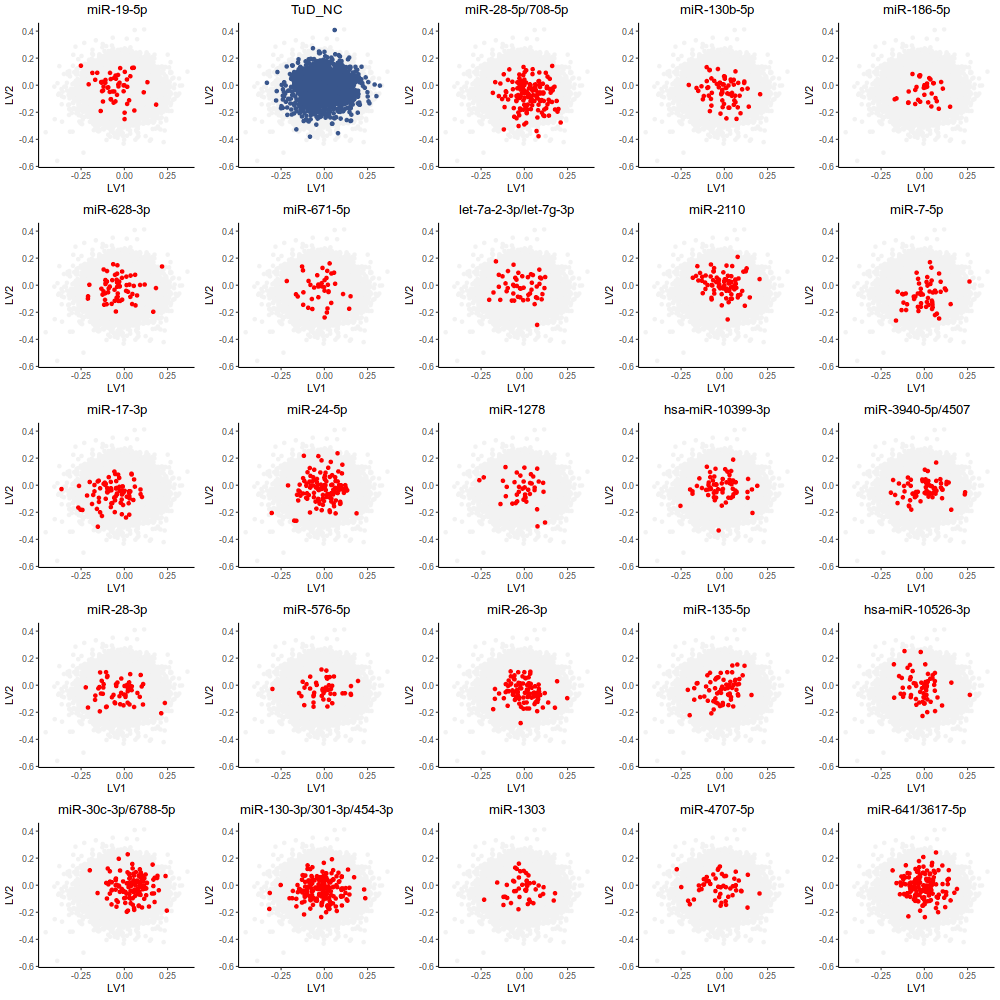

In [26]:
%%R -w 1000 -h 1000
## non-targeting control guides are blue and targeting guides are red
latent_plts[[1]]

In [27]:
%%R
## writing plots to file
pdf('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/miR_perturb_latent_maps.pdf', height = 12, width = 12)
for (i in 1:length(latent_plts)){
    print(latent_plts[[i]])
}
dev.off()

png 
  2 


In [28]:
%%R
## writing plots to file
pdf('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/miR_perturb_umaps.pdf', height = 12, width = 12)
for (i in 1:length(umap_plts)){
    print(umap_plts[[i]])
}
dev.off()

png 
  2 
